In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
del_df=pd.read_csv("C:\\Users\\Bhavani\Downloads\deliveries.csv")

In [4]:
print(del_df.info)

<bound method DataFrame.info of         match_id  inning           batting_team                 bowling_team  \
0         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
1         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
2         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
3         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
4         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
...          ...     ...                    ...                          ...   
260915   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260916   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260917   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260918   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260919   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   

       

In [23]:
print(del_df.head())

   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0

In [24]:
print(del_df.tail())

        match_id  inning           batting_team         bowling_team  over  \
260915   1426312       2  Kolkata Knight Riders  Sunrisers Hyderabad     9   
260916   1426312       2  Kolkata Knight Riders  Sunrisers Hyderabad     9   
260917   1426312       2  Kolkata Knight Riders  Sunrisers Hyderabad    10   
260918   1426312       2  Kolkata Knight Riders  Sunrisers Hyderabad    10   
260919   1426312       2  Kolkata Knight Riders  Sunrisers Hyderabad    10   

        ball   batter         bowler non_striker  batsman_runs  extra_runs  \
260915     5  SS Iyer     AK Markram     VR Iyer             1           0   
260916     6  VR Iyer     AK Markram     SS Iyer             1           0   
260917     1  VR Iyer  Shahbaz Ahmed     SS Iyer             1           0   
260918     2  SS Iyer  Shahbaz Ahmed     VR Iyer             1           0   
260919     3  VR Iyer  Shahbaz Ahmed     SS Iyer             1           0   

        total_runs extras_type  is_wicket player_dismissed dis

In [5]:
shape = del_df.shape
columns = del_df.columns.tolist()
data_types = del_df.dtypes

In [6]:
missing_values = del_df.isnull().sum()

# Summary statistics
summary_stats = del_df.describe(include="all")

In [7]:
deliveries_eda_results = {
    "Shape": shape,
    "Columns": columns,
    "Data Types": data_types,
    "Missing Values": missing_values,
    "Summary Statistics": summary_stats
}

print(deliveries_eda_results)

{'Shape': (260920, 17), 'Columns': ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder'], 'Data Types': match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batter              object
bowler              object
non_striker         object
batsman_runs         int64
extra_runs           int64
total_runs           int64
extras_type         object
is_wicket            int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object, 'Missing Values': match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker    

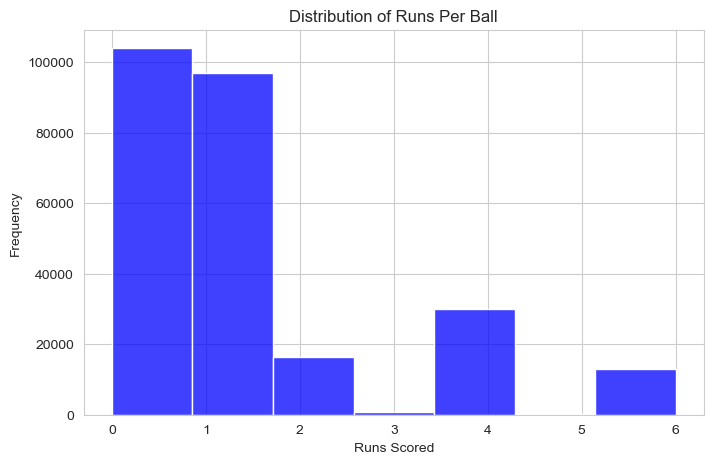

In [13]:
sns.set_style("whitegrid")

# --- Distribution of Runs Per Ball ---
plt.figure(figsize=(8, 5))
sns.histplot(del_df["batsman_runs"], bins=7, kde=False, color="blue")
plt.title("Distribution of Runs Per Ball")
plt.xlabel("Runs Scored")
plt.ylabel("Frequency")
plt.show()

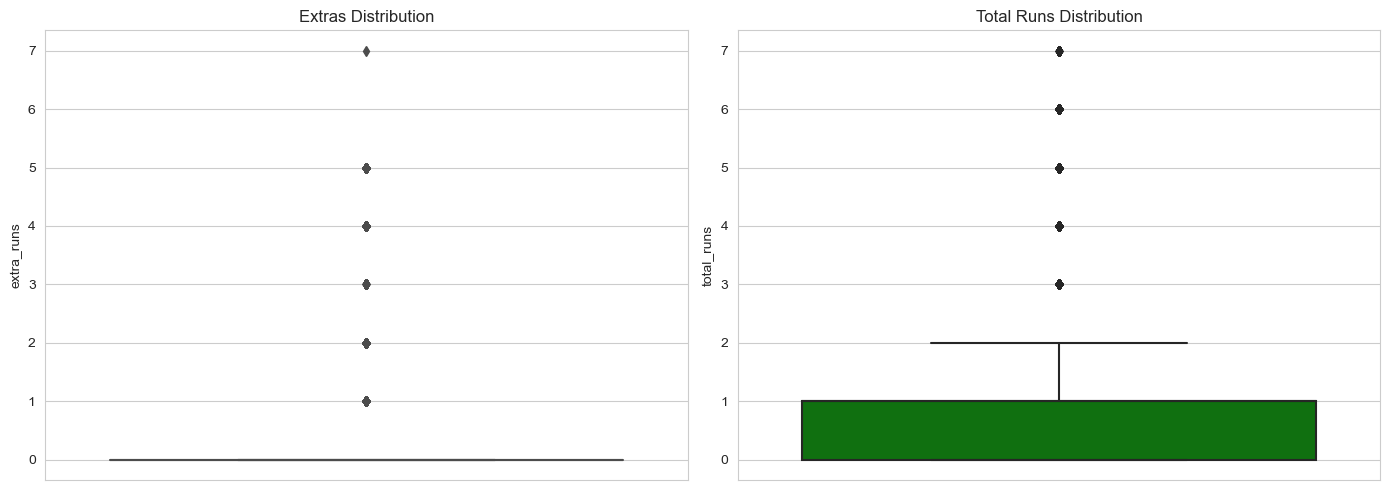

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(y=del_df["extra_runs"], ax=axes[0], color="red")
axes[0].set_title("Extras Distribution")

sns.boxplot(y=del_df["total_runs"], ax=axes[1], color="green")
axes[1].set_title("Total Runs Distribution")

plt.tight_layout()
plt.show()

C:\Users\Bhavani\AppData\Local\Temp\ipykernel_22796\3171394620.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(del_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


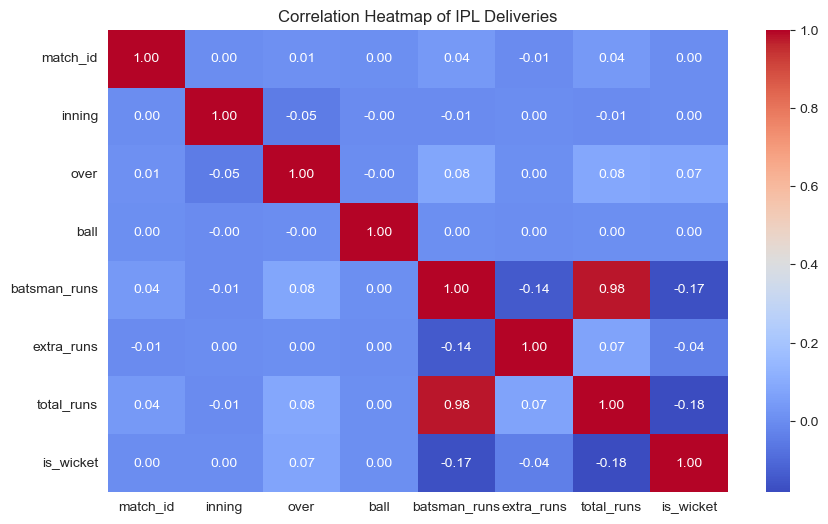

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(del_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of IPL Deliveries")
plt.show()

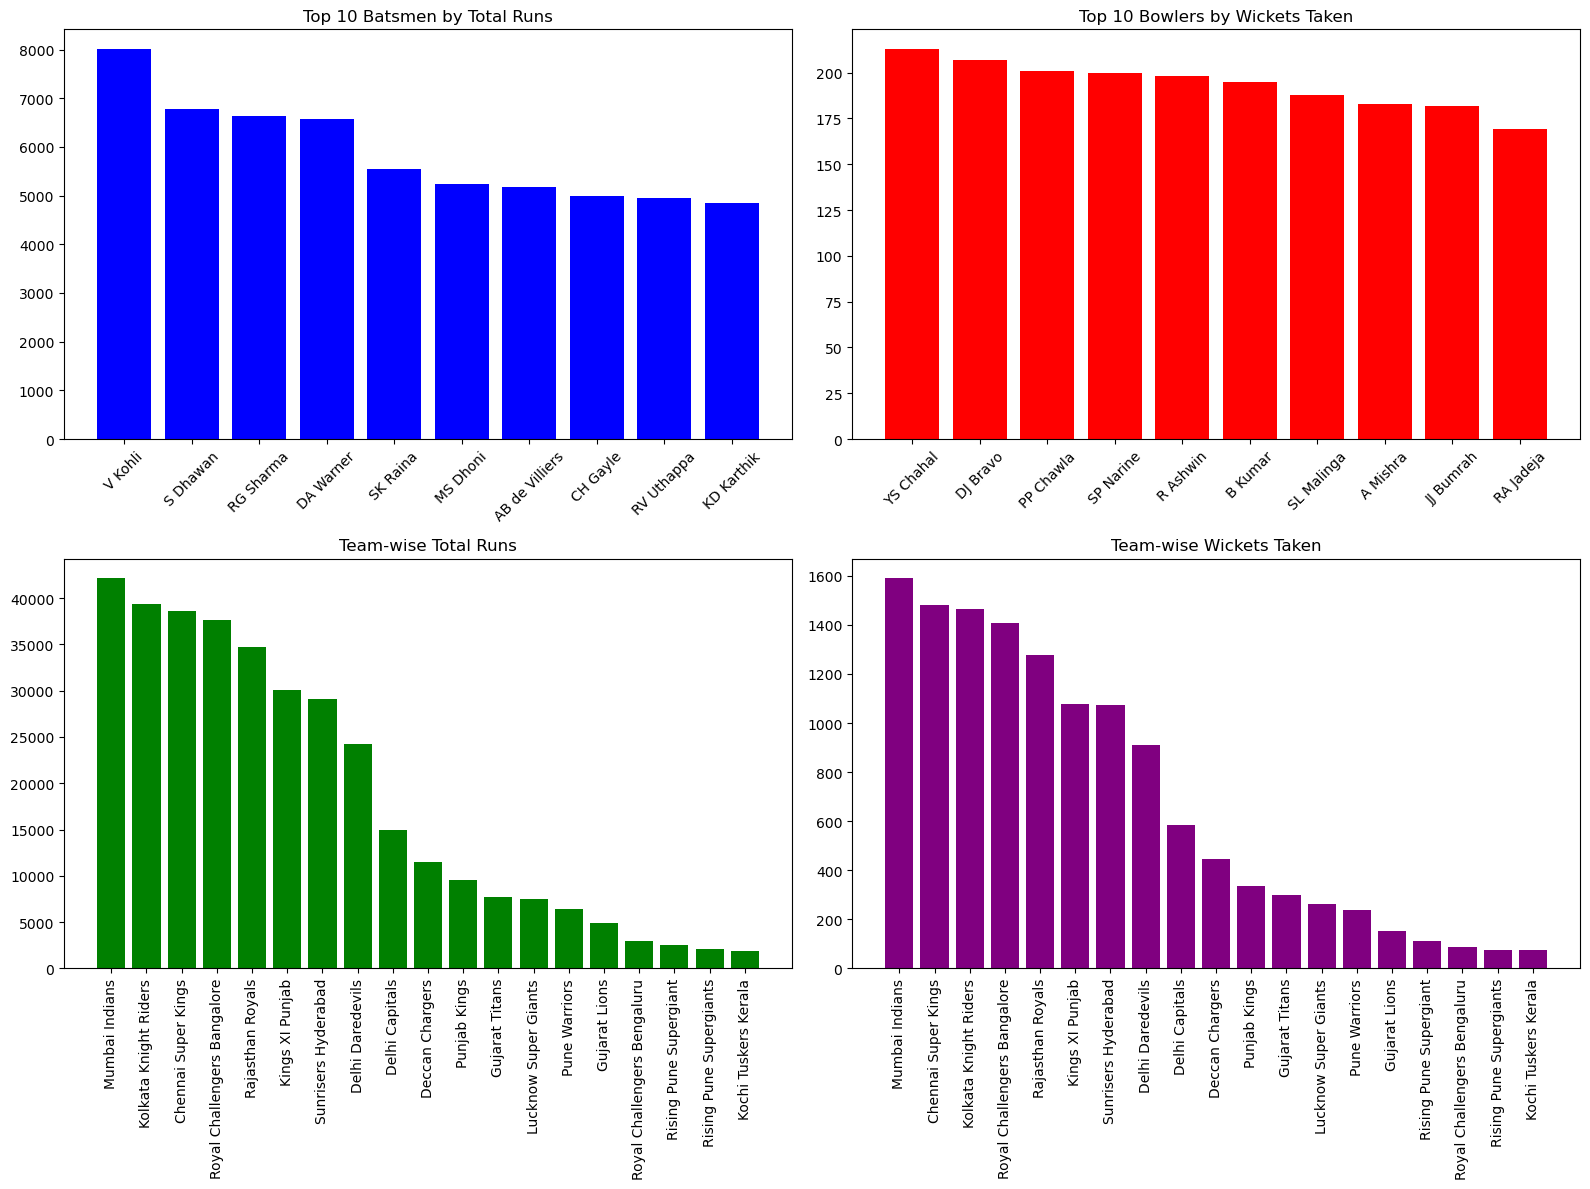

In [25]:
# --- Top 10 Batsmen by Total Runs ---
top_batsmen = del_df.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)

# --- Top 10 Bowlers by Wickets Taken ---
top_bowlers = del_df[del_df["dismissal_kind"].notna()]
top_bowlers = top_bowlers.groupby("bowler")["player_dismissed"].count().sort_values(ascending=False).head(10)

# --- Team-wise Total Runs ---
team_runs = del_df.groupby("batting_team")["total_runs"].sum().sort_values(ascending=False)

# --- Team-wise Wickets Taken ---
team_wickets = del_df[del_df["dismissal_kind"].notna()]
team_wickets = team_wickets.groupby("bowling_team")["player_dismissed"].count().sort_values(ascending=False)

# --- Dismissal Type Distribution ---
dismissal_counts = del_df["dismissal_kind"].value_counts()

# Plot Results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot each subplot
axes[0, 0].bar(top_batsmen.index, top_batsmen.values, color='blue')
axes[0, 0].set_title("Top 10 Batsmen by Total Runs")
axes[0, 0].tick_params(axis='x', rotation=45)

axes[0, 1].bar(top_bowlers.index, top_bowlers.values, color='red')
axes[0, 1].set_title("Top 10 Bowlers by Wickets Taken")
axes[0, 1].tick_params(axis='x', rotation=45)

axes[1, 0].bar(team_runs.index, team_runs.values, color='green')
axes[1, 0].set_title("Team-wise Total Runs")
axes[1, 0].tick_params(axis='x', rotation=90)

axes[1, 1].bar(team_wickets.index, team_wickets.values, color='purple')
axes[1, 1].set_title("Team-wise Wickets Taken")
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

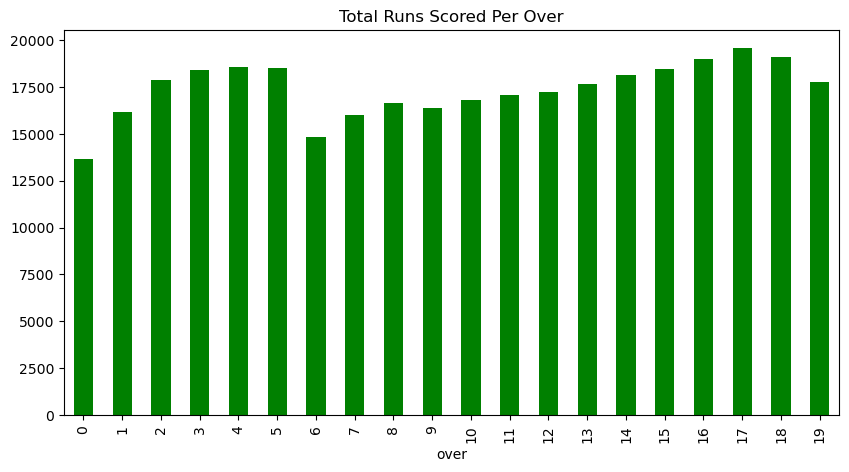

In [5]:
# Total Runs Scored Per Over
total_runs_per_over =del_df.groupby("over")["total_runs"].sum()
total_runs_per_over.plot(kind="bar", figsize=(10,5), title="Total Runs Scored Per Over",color='green')
plt.show()

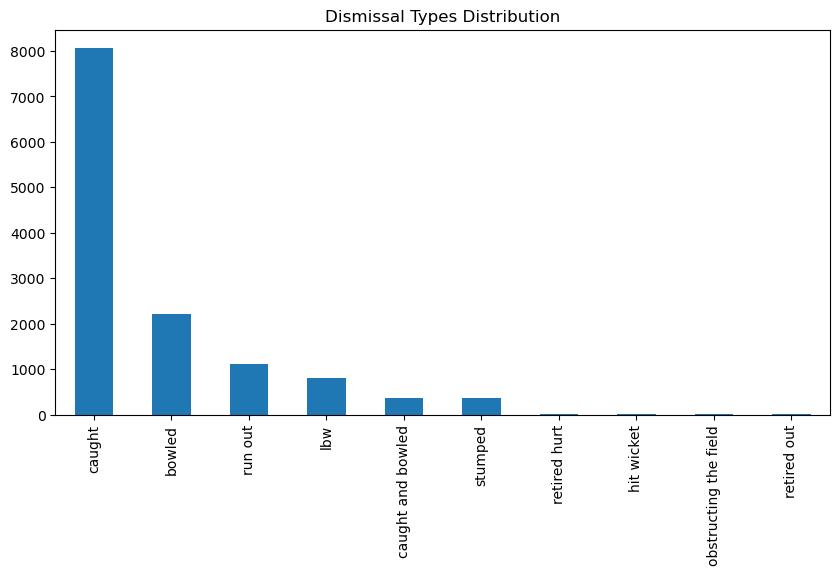

In [4]:
# Dismissal Types Distribution
dismissal_distribution = del_df["dismissal_kind"].value_counts()
dismissal_distribution.plot(kind="bar", figsize=(10,5), title="Dismissal Types Distribution")
plt.show()


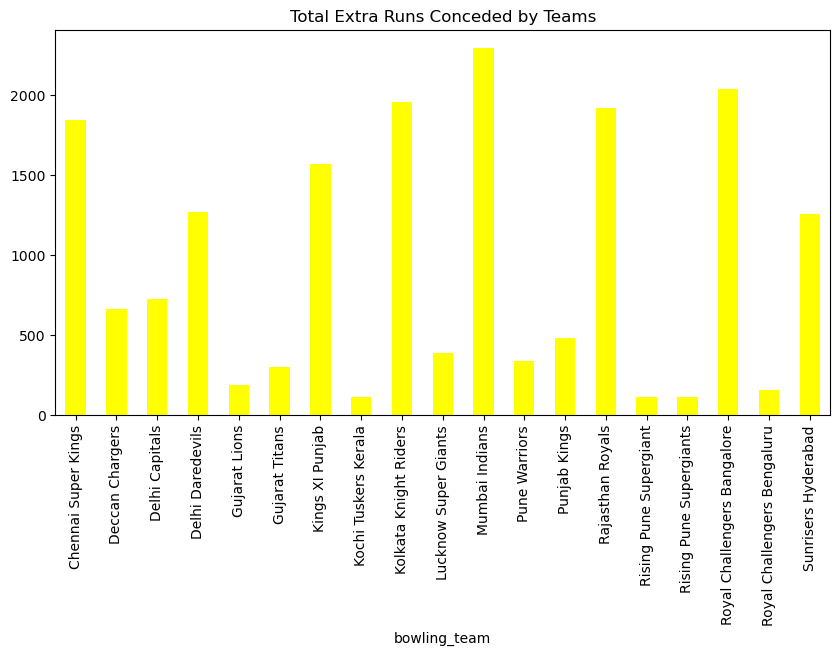

In [6]:
# Total Extra Runs Conceded by Teams
total_extra_runs = del_df.groupby("bowling_team")["extra_runs"].sum()
total_extra_runs.plot(kind="bar", figsize=(10,5), title="Total Extra Runs Conceded by Teams",color='Yellow')
plt.show()

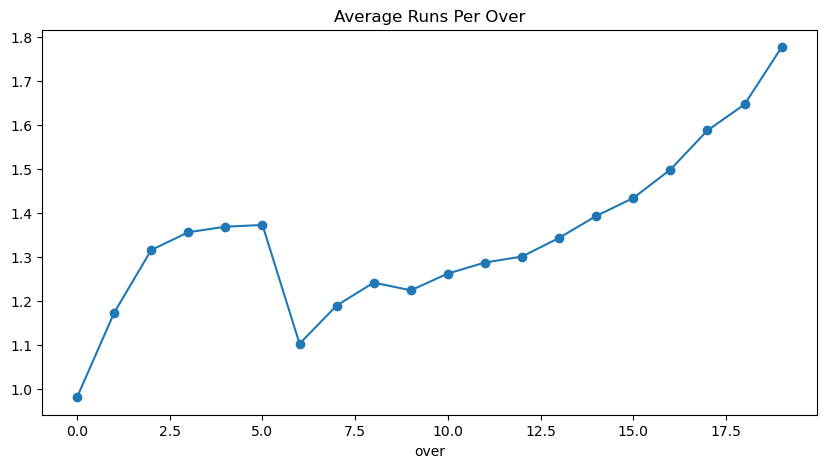

In [8]:
# Average Runs Per Over
average_runs_per_over = del_df.groupby("over")["total_runs"].mean()
average_runs_per_over.plot(kind="line", marker='o', figsize=(10,5), title="Average Runs Per Over")
plt.show()

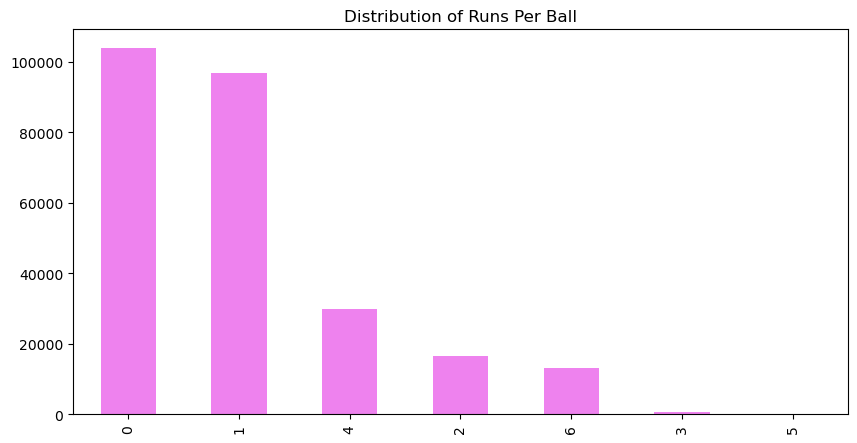

In [7]:
# Distribution of Runs Per Ball
runs_distribution = del_df["batsman_runs"].value_counts()
runs_distribution.plot(kind="bar", figsize=(10,5), title="Distribution of Runs Per Ball",color='violet')
plt.show()


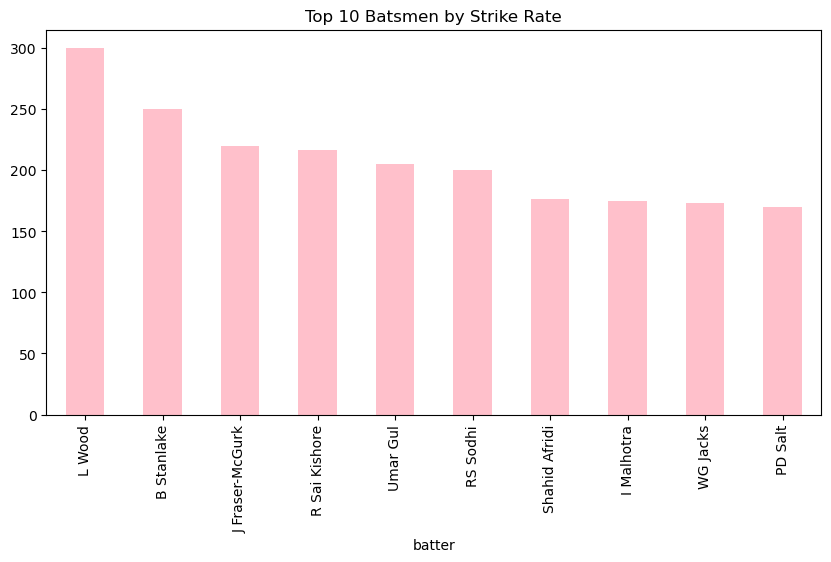

In [9]:
# Top 10 Batsmen by Strike Rate
batsman_stats =del_df.groupby("batter").agg({"batsman_runs": "sum", "ball": "count"})
batsman_stats["strike_rate"] = (batsman_stats["batsman_runs"] / batsman_stats["ball"]) * 100
top_10_batsmen = batsman_stats.sort_values("strike_rate", ascending=False).head(10)
top_10_batsmen["strike_rate"].plot(kind="bar", figsize=(10,5), title="Top 10 Batsmen by Strike Rate",color='pink')
plt.show()

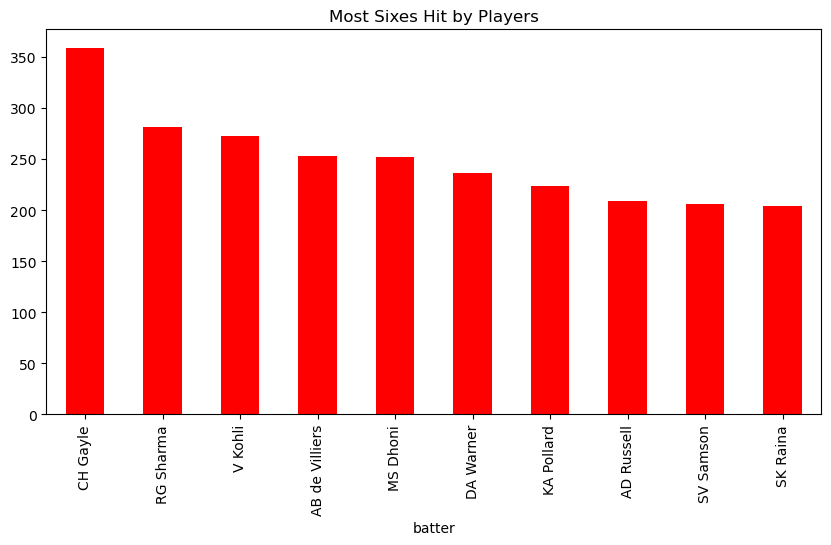

In [10]:
# Most Sixes Hit by Players
most_sixes =del_df[del_df["batsman_runs"] == 6].groupby("batter")["batsman_runs"].count()
most_sixes.sort_values(ascending=False).head(10).plot(kind="bar", figsize=(10,5), title="Most Sixes Hit by Players",color='red')
plt.show()

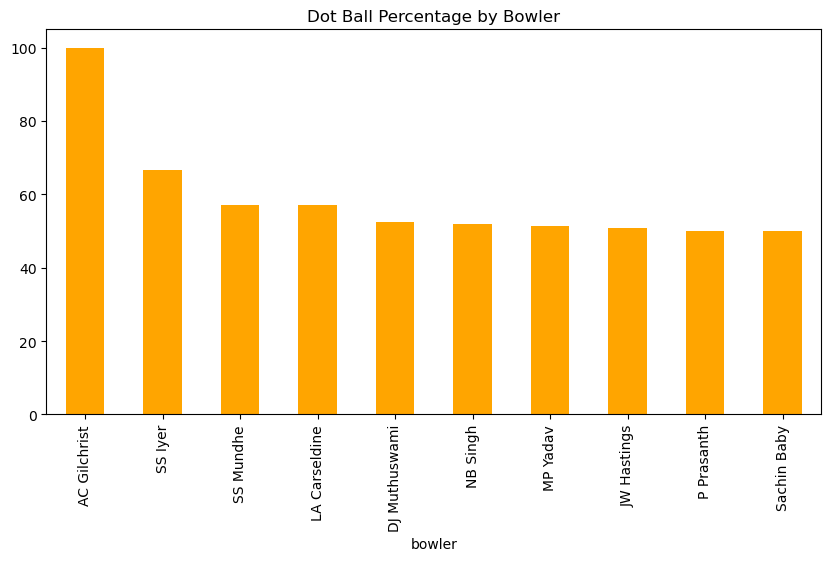

In [11]:
# Dot Ball Percentage by Bowler
dot_balls = del_df[del_df["total_runs"] == 0].groupby("bowler")["total_runs"].count()
total_balls = del_df.groupby("bowler")["total_runs"].count()
dot_ball_percentage = (dot_balls / total_balls) * 100
dot_ball_percentage.sort_values(ascending=False).head(10).plot(kind="bar", figsize=(10,5), title="Dot Ball Percentage by Bowler",color='orange')
plt.show()

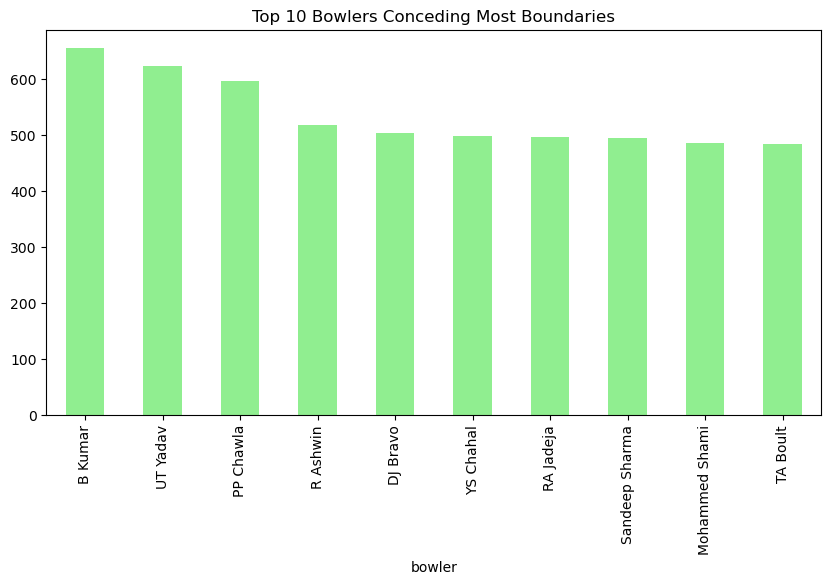

In [12]:
# Top 10 Bowlers Conceding Most Boundaries
boundaries = del_df[del_df["batsman_runs"].isin([4,6])].groupby("bowler")["batsman_runs"].count()
boundaries.sort_values(ascending=False).head(10).plot(kind="bar", figsize=(10,5), title="Top 10 Bowlers Conceding Most Boundaries",color='lightgreen')
plt.show()

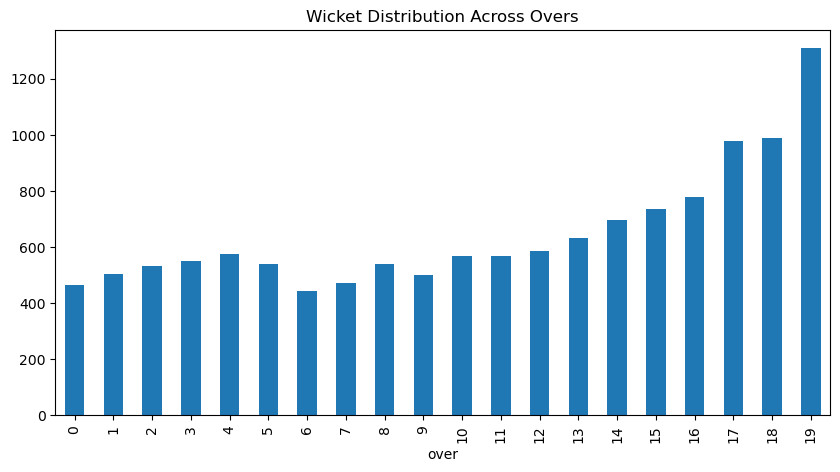

In [17]:
#Wicket Distribution Across Overs
wickets_per_over = del_df[del_df["is_wicket"] == 1].groupby("over")["is_wicket"].count()
wickets_per_over.plot(kind="bar", figsize=(10,5), title="Wicket Distribution Across Overs")
plt.show()

In [18]:
# Total Runs Scored in Powerplay
powerplay_runs = del_df[del_df["over"] < 6]["total_runs"].sum()
print(f"Total Runs Scored in Powerplay: {powerplay_runs}")

Total Runs Scored in Powerplay: 103217


In [19]:
# Total Runs Scored in Death Over
death_over_runs = del_df[del_df["over"] >= 16]["total_runs"].sum()
print(f"Total Runs Scored in Death Overs: {death_over_runs}")

Total Runs Scored in Death Overs: 75412


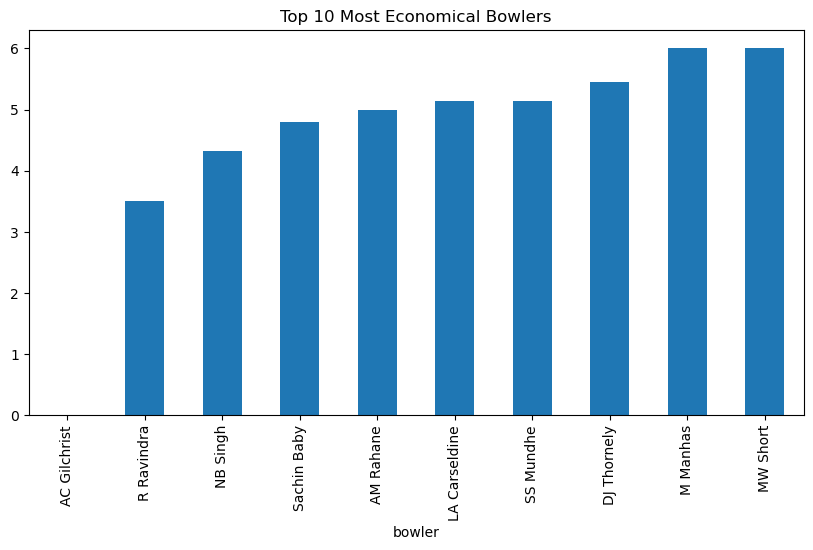

In [20]:
# Top 10 Most Economical Bowlers
bowler_stats = del_df.groupby("bowler").agg({"total_runs": "sum", "ball": "count"})
bowler_stats["economy"] = (bowler_stats["total_runs"] / (bowler_stats["ball"] / 6))
top_10_economical_bowlers = bowler_stats.sort_values("economy").head(10)
top_10_economical_bowlers["economy"].plot(kind="bar", figsize=(10,5), title="Top 10 Most Economical Bowlers")
plt.show()

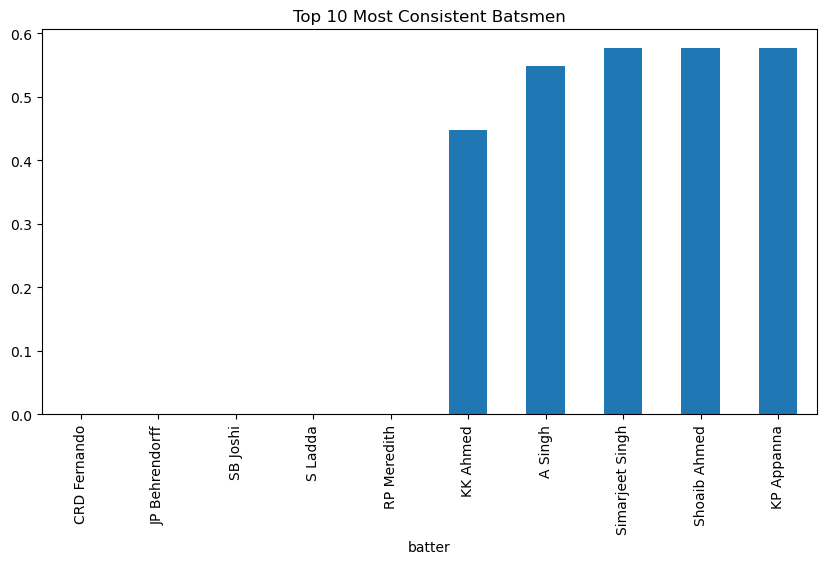

In [26]:
# Batting Consistency Index
batsman_scores = del_df.groupby(["batter", "match_id"])["batsman_runs"].sum().reset_index()
batting_consistency = batsman_scores.groupby("batter")["batsman_runs"].std().sort_values().head(10)
batting_consistency.plot(kind="bar", figsize=(10,5), title="Top 10 Most Consistent Batsmen")
plt.show()

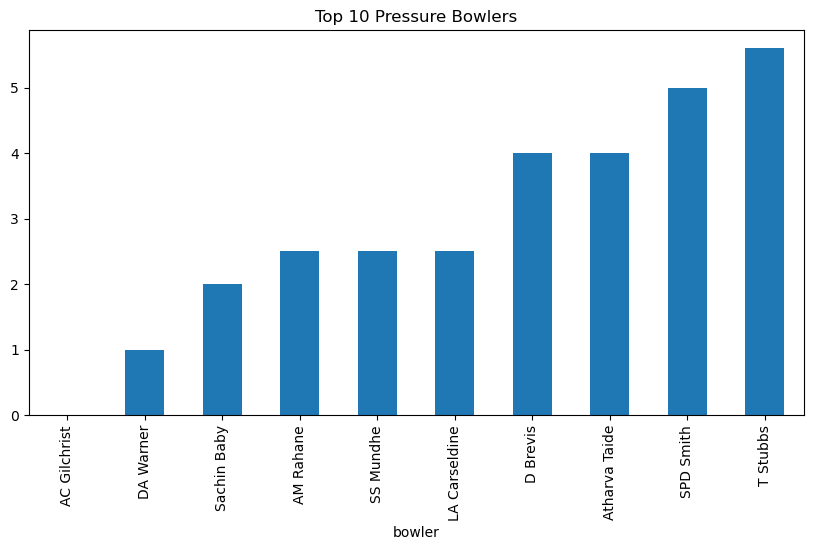

In [27]:
# Bowling Pressure Index
bowler_pressure = del_df.groupby("bowler").agg({"player_dismissed": "count", "batsman_runs": "sum"})
bowler_pressure["pressure_index"] = bowler_pressure["batsman_runs"] / (bowler_pressure["player_dismissed"] + 1)
bowler_pressure.sort_values("pressure_index").head(10)["pressure_index"].plot(kind="bar", figsize=(10,5), title="Top 10 Pressure Bowlers")
plt.show()
